In [1]:
##### Import the necessary modules #####

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np

C:\Users\Owner\Anaconda3\envs\R_and_Python3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Owner\Anaconda3\envs\R_and_Python3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Owner\Anaconda3\envs\R_and_Python3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Owner\Anaconda3\envs\R_and_Python3\lib\s

In [2]:
## Load in the training and testing images using ImageDataGenerator
# Training images
train_datagen = ImageDataGenerator()
train_dir = 'C:/Users/Owner/Documents/STAT 6750/Project/data_upload_v2/train'

train_covid_dir = 'C:/Users/Owner/Documents/STAT 6750/Project/data_upload_v2/train/covid'
train_covid_names = os.listdir(train_covid_dir)

train_non_dir = 'C:/Users/Owner/Documents/STAT 6750/Project/data_upload_v2/train/non'
train_non_names = os.listdir(train_non_dir)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (250, 250),
    batch_size = 20,
    class_mode = 'binary'
)

#Testing images
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_dir = 'C:/Users/Owner/Documents/STAT 6750/Project/data_upload_v2/test'

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (250, 250),
    batch_size = 20,
    class_mode = 'binary'
)
print(train_generator.class_indices)

Found 664 images belonging to 2 classes.
Found 3100 images belonging to 2 classes.
{'covid': 0, 'non': 1}


['kjr-21-e24-g001-l-a.jpg']
['No Finding-patient17231-study1-view1_frontal.jpg']


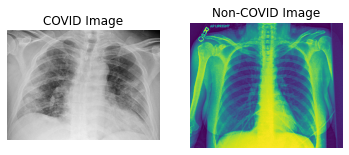

(237, 328, 3)


In [3]:
## Visualize some of the images

sp = plt.subplot(1, 2, 1, title = 'COVID Image')
sp.axis('off')

# Visualize a COVID case
random_covid_pic_name = random.sample(train_covid_names, k = 1)
print(random_covid_pic_name)
covid_pic_path = os.path.join(train_covid_dir, random_covid_pic_name[0])
covid_img = mpimg.imread(covid_pic_path)
plt.imshow(covid_img)


sp = plt.subplot(1, 2, 2, title = 'Non-COVID Image')
sp.axis('off')

# Visualize a non-covid case
random_non_pic_name = random.sample(train_non_names, k = 1)
print(random_non_pic_name)
non_pic_path = os.path.join(train_non_dir, random_non_pic_name[0])
non_img = mpimg.imread(non_pic_path)
plt.imshow(non_img)



plt.show()
print(covid_img.shape)

In [4]:
## Define a logistic regression model as a perceptron with sigmoid activation function
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (250, 250, 3)),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
## Train the logistic regression model
history = model.fit(train_generator,
                              validation_data = validation_generator,
                              steps_per_epoch = 100,
                              epochs = 15,
                              validation_steps = 50,
                              verbose = 2)

Epoch 1/15
100/100 - 61s - loss: 1607.2743 - acc: 0.8402 - val_loss: 2.7091 - val_acc: 0.7330
Epoch 2/15
100/100 - 40s - loss: 328.5287 - acc: 0.9032 - val_loss: 0.4062 - val_acc: 0.9750
Epoch 3/15
100/100 - 40s - loss: 261.3981 - acc: 0.9065 - val_loss: 1.0817 - val_acc: 0.8950
Epoch 4/15
100/100 - 40s - loss: 350.7318 - acc: 0.9091 - val_loss: 1.5906 - val_acc: 0.8970
Epoch 5/15
100/100 - 39s - loss: 173.0387 - acc: 0.9472 - val_loss: 0.5779 - val_acc: 0.9630
Epoch 6/15
100/100 - 39s - loss: 170.5367 - acc: 0.9421 - val_loss: 0.6056 - val_acc: 0.9550
Epoch 7/15
100/100 - 37s - loss: 179.7013 - acc: 0.9385 - val_loss: 1.8662 - val_acc: 0.8800
Epoch 8/15
100/100 - 38s - loss: 103.9580 - acc: 0.9539 - val_loss: 0.6858 - val_acc: 0.9630
Epoch 9/15
100/100 - 38s - loss: 29.4954 - acc: 0.9812 - val_loss: 1.2999 - val_acc: 0.9060
Epoch 10/15


KeyboardInterrupt: 

In [ ]:
# Predict an image classification
manual_test_img_name = random.sample(train_covid_names, k = 1)[0]

img = image.load_img(os.path.join(train_covid_dir, manual_test_img_name), target_size=(250, 250))
x = image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
print(x.shape) 
classes = model.predict(x, batch_size=10)
print(classes[0])

In [ ]:
test_covid_dir = 'C:/Users/Owner/Documents/STAT 6750/Project/data_upload_v2/test/covid'
test_covid_names = os.listdir(train_covid_dir)

test_non_dir = 'C:/Users/Owner/Documents/STAT 6750/Project/data_upload_v2/test/non'
test_non_names = os.listdir(train_non_dir)




In [ ]:
# Predict an image classification
manual_test_img_name = random.sample(train_covid_names, k = 1)[0]

manual_test_path = os.path.join(train_covid_dir, manual_test_img_name)
img = image.load_img(manual_test_path, target_size=(250, 250))
x = image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
print(x.shape) 
classes = model.predict(x, batch_size=10)

print(classes[0])
manual_test_img = mpimg.imread(manual_test_path)
if classes[0] > 0:
    plt.title('This is a picture of a COVID-negative x-ray.')
else:
    plt.title('This is a picture of a COVID-positive x-ray.')
plt.imshow(manual_test_img)
